In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments_df = pd.read_csv("../data/skillshare_2022_comments.csv", index_col=0)
# comments_df.user_id = comments_df.user_id.astype(str)
comments_df.head()

,id,comment,user_id,commentable_id,commentable_type,origin_id,origin_type,num_up,num_down,score,is_deleted,is_from_email,update_time,create_time,is_author_subscribed,is_reported,reported_by_uid
0,1098793,<p>This is a gorgeous pattern. Wow! So inspiri...,6304085,421199,Project,421199,Project,0,0,NaN,NaN,False,2022-01-01 01:12:43,2022-01-01 01:12:43,True,NaN,NaN
1,1098810,<p>Wow ! Love it !! Waiting to see more of the...,15131719,421392,Project,421392,Project,1,0,1.0,NaN,False,2022-01-11 01:28:58,2022-01-01 03:19:55,True,NaN,NaN
2,1098820,"Thankyou. Yes, I do struggle with those palm p...",988232,1096435,Comment,419898,Project,0,0,NaN,NaN,False,2022-01-01 04:51:03,2022-01-01 04:51:03,True,NaN,NaN
3,1099525,"<p>Hi Anastasia, I'm happy to help! Spoonflow...",4218757,303432,Discussion,303432,Discussion,0,0,NaN,NaN,False,2022-01-03 13:22:02,2022-01-03 13:22:02,True,NaN,NaN
4,1099526,"<p>Hi Sally, I'm happy to help! So just to do...",4218757,303399,Discussion,303399,Discussion,0,0,NaN,NaN,False,2022-01-03 13:23:38,2022-01-03 13:23:38,True,NaN,NaN


In [3]:
totaled_comments = comments_df.user_id\
    .value_counts()\
    .reset_index()\
    .rename(columns={"user_id":"total_comments"})\
    .rename(columns={"index":"user_uid"})

totaled_comments

,user_uid,total_comments
0,3900428,520
1,4218757,448
2,2782080,407
3,2360844,333
4,2392418,269
...,...,...
4773,14297714,1
4774,25274353,1
4775,24942496,1
4776,24691697,1


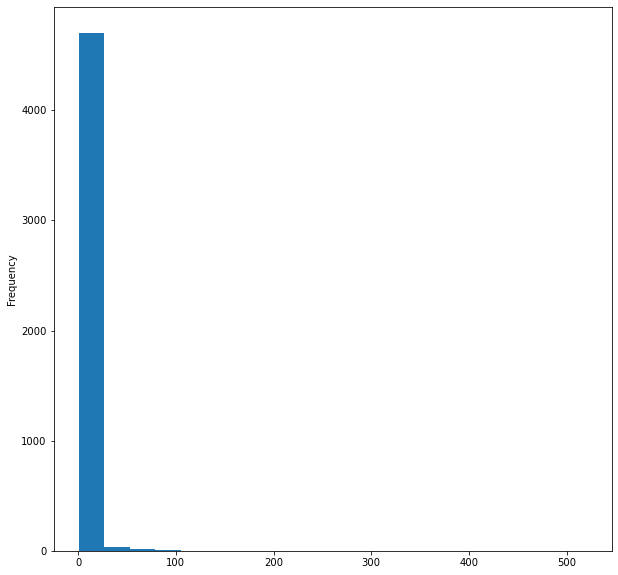

In [4]:
plt.figure(figsize=(10,10))
totaled_comments.total_comments\
    .plot.hist(bins=20)
plt.show()

In [5]:
combined = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)
combined = pd.merge(combined, totaled_comments, on="user_uid", how="outer")
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_comments
0,23692129,2022-01-01 00:00:02,0.0,True,2.0,2.0,0.0,10.0,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,23674285,2022-01-01 00:00:27,0.0,False,-1.0,-1.0,0.0,2.0,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,16119588,2022-01-01 00:01:19,1.0,False,1.0,5.0,0.0,10.0,30.0,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,23693101,2022-01-01 00:01:42,0.0,False,2.0,2.0,0.0,16.0,55.0,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,23692349,2022-01-01 00:02:04,1.0,False,2.0,2.0,0.0,16.0,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
totaled_comments_with_na = combined.total_comments\
    .value_counts(dropna=False)

totaled_comments_with_na

NaN      472667
1.0        3054
2.0         782
3.0         301
4.0         160
          ...  
84.0          1
76.0          1
73.0          1
72.0          1
120.0         1
Name: total_comments, Length: 76, dtype: int64

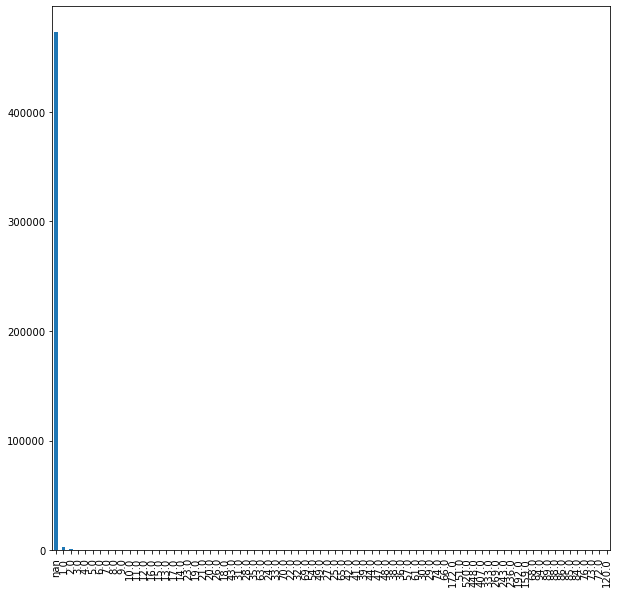

In [7]:
plt.figure(figsize=(10,10))
totaled_comments_with_na.plot.bar()
plt.show()